In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
xls = pd.ExcelFile('IDS_Report.xlsx')

In [6]:
df_2017 = pd.read_excel(xls, '2017')

In [7]:
df_2017.head()

,REGION_OF_SEIZURE,SUBREGION_OF_SEIZURE,COUNTRY_OF_SEIZURE,ADMINISTRATIVE_DIVISION,PLACE,SEIZURE_DATE,DRUG_NAME,AMOUNT_OF_DRUG,DRUG_UNIT,HIDING_PLACE,INSTALLATION,TRANSPORT,PRODUCING_COUNTRY,DEPARTURE_COUNTRY,DESTINATION_COUNTRY,ROUTE_TYPE
0,Asia,Near and Middle East /South-West Asia,Syrian Arab Republic,Damascus,NaN,2017-05-09,Cannabis resin,680.0,Gram,Plastic bags,Street,Other,NaN,NaN,NaN,NaN
1,Asia,Near and Middle East /South-West Asia,Syrian Arab Republic,Damascus,NaN,2017-04-15,Heroin,2026.0,Gram,Plastic bags,Flat/Apartment,Other,NaN,NaN,NaN,NaN
2,Asia,Near and Middle East /South-West Asia,Syrian Arab Republic,Damascus,NaN,2017-04-15,Heroin,2026.0,Gram,Plastic bags,Flat/Apartment,Other,NaN,NaN,NaN,NaN
3,Asia,Near and Middle East /South-West Asia,Syrian Arab Republic,Damascus,NaN,2017-03-13,Cannabis resin,25.0,Kilogram,Food,Street,Other,NaN,NaN,NaN,NaN
4,Asia,Near and Middle East /South-West Asia,Syrian Arab Republic,Aleppo,NaN,2017-09-26,Captagon,94500.0,Gram,Food,Car,Commercial road,NaN,NaN,NaN,NaN


In [8]:
df_2017[['DEPARTURE_COUNTRY', 'COUNTRY_OF_SEIZURE', 'DESTINATION_COUNTRY']].isnull().sum() / len(df_2017)

DEPARTURE_COUNTRY      0.094161
COUNTRY_OF_SEIZURE     0.000000
DESTINATION_COUNTRY    0.851721
dtype: float64

In [12]:
len(df_2017)

193170

In [17]:
set(df_2017['DRUG_NAME'])

{'25C-NBOMe',
 '25I-NBOMe',
 '2C-B',
 '4-Chloromethcathinone',
 '4-Fluoroamphetamine',
 '5F-AB-PINACA',
 '5F-ADB',
 '5F-AKB48',
 '5F-AMB',
 'ADB-CHMINACA ',
 'Acetic Anhydride',
 'Acetone/Ethyl Ether',
 'Alpha-pvp',
 'Alprazolam (Xanax)',
 'Amphetamine',
 'Ayahuasca',
 'BB-22',
 'Benzodiazepine',
 'Buprenorphine',
 'CP 47',
 'Cannabis',
 'Cannabis Herb (Marijuana)',
 'Cannabis Oil',
 'Cannabis Plants',
 'Cannabis Pollen',
 'Cannabis resin',
 'Cannabis seeds',
 'Captagon',
 'Carfentanil',
 'Cathinone',
 'Clonazepam',
 'Coca leaf',
 'Coca paste',
 'Cocaine',
 'Cocaine HCL',
 'Controlled Drug Mix',
 'Cough sirups',
 'Crack',
 'Diazepam',
 'Dimethyltryptamine (DMT)',
 'Ecstasy',
 'Ephedrine',
 'Fentanyl',
 'GBL',
 'Heroin',
 'JWH-018',
 'JWH-073',
 'JWH-081',
 'Ketamine',
 'Khat',
 'LSD',
 'MDA',
 'MDMB-CHMICA',
 'MDP2P',
 'Mephedrone',
 'Methadone',
 'Methamphetamine',
 'Methaqualone',
 'Methylhexanamine',
 'Morphine',
 'Multiple drugs ',
 'Non-specified NPS',
 'Non-specified precursors',

In [17]:
df_2017['DRUG_NAME'].loc[lambda x: x == 'Cocaine']

1426      Cocaine
1605      Cocaine
1732      Cocaine
1742      Cocaine
1752      Cocaine
           ...   
193103    Cocaine
193119    Cocaine
193134    Cocaine
193154    Cocaine
193159    Cocaine
Name: DRUG_NAME, Length: 14766, dtype: object

In [40]:
df_2017[df_2017['DRUG_NAME'] == 'Cocaine'][['COUNTRY_OF_SEIZURE', 'DEPARTURE_COUNTRY', 'DESTINATION_COUNTRY']]

,COUNTRY_OF_SEIZURE,DEPARTURE_COUNTRY,DESTINATION_COUNTRY
1426,Latvia,NaN,NaN
1605,Latvia,NaN,NaN
1732,Latvia,Netherlands,Latvia
1742,Latvia,Netherlands,Latvia
1752,Latvia,Netherlands,Latvia
...,...,...,...
193103,Bulgaria,Netherlands,Bulgaria
193119,Bulgaria,Netherlands,Turkey
193134,Bulgaria,Peru,Bulgaria
193154,Bulgaria,Brazil,Bulgaria


In [34]:
pd.DataFrame(df_2017['DRUG_NAME'].value_counts()).head(10)

,DRUG_NAME
Cannabis Herb (Marijuana),84474
Coca paste,60292
Cocaine HCL,16970
Cocaine,14766
Methamphetamine,5305
Cannabis resin,2096
Unknown,1846
Heroin,1797
Coca leaf,1468
Crack,1333


In [4]:
def read_xls(file = 'IDS_Report.xlsx', start_year = 2006, final_year = 2017): 
    xls = pd.ExcelFile(file)
    df = dict()
    for year in range(start_year, final_year + 1):
        df[year] = pd.read_excel(xls, str(year))
    return df

In [5]:
df_ids = read_xls()

In [7]:
df_ids[2006].head()

,REGION_OF_SEIZURE,SUBREGION_OF_SEIZURE,COUNTRY_OF_SEIZURE,CITY,SEIZURE_DATE,DRUG_NAME,ATS_NAME,AMOUNT_OF_DRUG,DRUG_UNIT,REGIONAL_KG_EQUIVALENT,HIDING_PLACE,INSTALLATION,TRANSPORT,PRODUCING_COUNTRY,DEPARTURE_COUNTRY,DESTINATION_COUNTRY
0,Europe,West & Central Europe,Italy,VERONA,2006-09-30,Cocaine,NaN,0.152,Kilogram,0.152,NaN,NaN,NaN,Unknown,Unknown,Unknown
1,Europe,West & Central Europe,Italy,VARESE,2006-09-30,Cocaine,NaN,15.500,Kilogram,15.500,Baggage,NaN,Commercial air,"Venezuela, Bolivarian Republic of",Unknown,Italy
2,Europe,West & Central Europe,Italy,PESARO,2006-09-30,Cannabis resin,NaN,2.600,Kilogram,2.600,NaN,NaN,NaN,Unknown,Unknown,Unknown
3,Europe,West & Central Europe,Italy,MONTIRONE,2006-09-30,Cocaine,NaN,0.101,Kilogram,0.101,NaN,NaN,NaN,Unknown,Unknown,Unknown
4,Europe,West & Central Europe,Italy,DESENZANO DEL GARDA,2006-09-29,Cocaine,NaN,5.500,Kilogram,5.500,Inserted,NaN,Other,Spain,Unknown,Italy


In [8]:
from Quantity_Conversion import convert

In [9]:
def get_drug_selector_function(drug_name):
    
    if drug_name == 'Cocaine':
        
        def get_cocaine_seizures(df):
            df_cocaine = df[(df['DRUG_NAME'] == 'Cocaine') | (df['DRUG_NAME'] == 'Cocaine HCL') | (df['DRUG_NAME'] == 'Coca paste') | (df['DRUG_NAME'] == 'Coca leaf') | (df['DRUG_NAME'] == 'Crack')]
            return df_cocaine
            
        return get_cocaine_seizures
    
    elif drug_name == 'Heroin':
        
        def get_heroin_seizures(df):
            df_heroin = df[(df['DRUG_NAME'] == 'Heroin') | (df['DRUG NAME'] == 'Opium') | (df['DRUG_NAME'] == 'Opium Poppy') | (df['DRUG NAME'] == 'Poppy seeds') | (df['DRUG_NAME'] == 'Poppy straw') | (df['DRUG_NAME'] == 'Morphine')]
            return df_heroin
            
        return get_heroin_seizures
    
    elif drug_name == 'Cannabis':
        
        def get_cannabis_seizures(df):
            df_cannabis = df[(df['DRUG_NAME'] == 'Cannabis') | (df['DRUG_NAME'] == 'Cannabis resin') | (df['DRUG_NAME'] == 'Cannabis Oil') | (df['DRUG_NAME'] == 'Cannabis Pollen') | (df['DRUG_NAME'] == 'Cannabis seeds') | (df['DRUG_NAME'] == 'Cannabis Plants') | (df['DRUG_NAME'] == 'Cannabis Herb (Marijuana)') | (df['DRUG_NAME'] == 'THC')]
            return df_cannabis
            
        return get_cannabis_seizures
    
    elif drug_name == 'Amphetamine':
        
        def get_amphetamine_seizures(df):
            df_amphetamine = df[(df['DRUG_NAME'] == 'Amphetamine') | (df['DRUG_NAME'] == 'Methamphetamine') | (df['DRUG_NAME'] == '4-Fluoroamphetamine') | (df['DRUG_NAME'] == 'MDA')]
            return df_aphetamine
            
        return get_aphetamine_seizures
    
    elif drug_name == 'Ecstasy':
        
        def get_ecstasy_seizures(df):
            df_ecstasy = df[(df['DRUG_NAME'] == 'Ecstasy') | (df['DRUG_NAME'] == 'MDP2P')]
            return df_ecstasy
            
        return get_ecstasy_seizures
    
    else:
        raise Exception('Invalid drug type!')
    
    
    

In [41]:
def get_drug_network_by_year(drug_name, df_ids, start_year = 2006, end_year = 2017):
    
    # Initialize container for the yearly graphs: dict of nx.DiGraphs
    network_by_year = {year: nx.DiGraph() for year in range(start_year, end_year + 1)}
    
    # Get the selector function for the given drug-type
    get_drug_seizures = get_drug_selector_function(drug_name)
    
    # Iterate over the time period
    for year in range(start_year, end_year + 1):
        
        # Select the year 
        df_year = df_ids[year]
        
        # Select the drug
        df_year_drug = get_drug_seizures(df_year)
        
        # Iterate over the results
        for ind in df_year_drug.index:
            
            # Check for non-string values (including nan)
            if not isinstance(df_year_drug['COUNTRY_OF_SEIZURE'][ind], str):
                continue 
            else:
                country_of_seizure = df_year_drug['COUNTRY_OF_SEIZURE'][ind]
                
            # Get the specific drug type
            drug_type = df_year_drug['DRUG_NAME'][ind]
            
            # Check for non-string values (including nan)
            if isinstance(df_year_drug['PRODUCING_COUNTRY'][ind], str):
                producing_country = df_year_drug['PRODUCING_COUNTRY'][ind]
            else:
                producing_country = None
            
            # Check for non-string values (including nan)
            if isinstance(df_year_drug['DEPARTURE_COUNTRY'][ind], str):
                departure_country = df_year_drug['DEPARTURE_COUNTRY'][ind]
            else:
                departure_country = None
            
            # Check for non-string values (including nan)
            if isinstance(df_year_drug['DESTINATION_COUNTRY'][ind], str):
                destination_country = df_year_drug['DESTINATION_COUNTRY'][ind]
            else:
                destination_country = None
            
            # Get the drug amount
            drug_amount = df_year_drug['AMOUNT_OF_DRUG'][ind]
            
            # Get the drug unit
            drug_unit = df_year_drug['DRUG_UNIT'][ind]
            
            # Convert the amount of drug to pure subtance in kilograms
            drug_amount = convert(drug_name, drug_amount, drug_type, drug_unit)
                
            # Add the nodes if not present already
            if not (country_of_seizure in network_by_year[year].nodes):
                network_by_year[year].add_node(country_of_seizure, producer = False)
            if (not (departure_country in network_by_year[year].nodes)) and (not (departure_country is None)):
                network_by_year[year].add_node(departure_country, producer = False)
            if not (destination_country in network_by_year[year].nodes) and (not (destination_country is None)):
                network_by_year[year].add_node(destination_country, producer = False)
            if not (producing_country is None):
                if not (producing_country in network_by_year[year].nodes):
                    network_by_year[year].add_node(producing_country, producer = True)
                else:
                    # Update the profucer status
                    network_by_year[year].nodes[producing_country]['producer'] = True
            
            # Add the edges
            if (not (departure_country is None)) and (departure_country != country_of_seizure) and (departure_country != 'Unknown'):
                
                if (departure_country, country_of_seizure) in network_by_year[year].edges:
                    network_by_year[year].edges[departure_country, country_of_seizure]['weight'] += drug_amount
                else:
                    network_by_year[year].add_edge(departure_country, country_of_seizure, weight = drug_amount)
            if (not (destination_country is None)) and (destination_country != country_of_seizure) and (destination_country != 'Unknown'):
                
                if (country_of_seizure, destination_country) in network_by_year[year].edges:
                    network_by_year[year].edges[country_of_seizure, destination_country]['weight'] += drug_amount
                else:
                    network_by_year[year].add_edge(country_of_seizure, destination_country, weight = drug_amount)
    
    # Return the dictionary of networks
    return network_by_year

In [42]:
cocaine_networks = get_drug_network_by_year('Cocaine', df_ids)

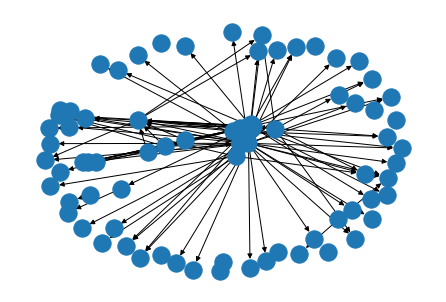

In [11]:
G = get_edges('Cocaine', 2017)

In [48]:
('Netherlands', 'Latvia') in G.edges

True

In [12]:
G.nodes

NodeView(('Netherlands', 'Latvia', 'Slovakia', 'Peru', 'Mexico', 'Panama', 'Brazil', 'Spain', 'United States', 'Colombia', 'Australia', 'Canada', 'Ecuador', 'China', 'Singapore', 'Belgium', 'Luxembourg', 'El Salvador', 'Guatemala', 'Honduras', 'Ghana', 'Nigeria', 'Germany', 'Paraguay', 'Uruguay', 'Netherlands Antilles', 'Cyprus', 'Cuba', 'Turkey', 'Bahamas', 'Albania', 'Croatia', 'Czech Republic', 'Austria', 'Italy', 'Slovenia', 'Guinea-Bissau', 'Pakistan', 'South Africa', 'France', 'Argentina', 'United Arab Emirates', 'Bolivia, Plurinational State of', 'Venezuela, Bolivarian Republic of', 'Cambodia', 'Chile', 'Dominican Republic', 'Georgia', 'Costa Rica', 'Maldives', 'Russian Federation', 'Israel', 'Morocco', 'Greece', 'Portugal', 'Hong Kong', 'Bulgaria'))

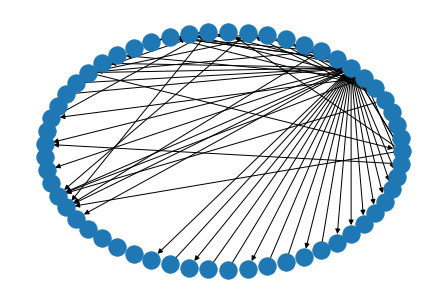

In [13]:
nx.draw(G, nx.circular_layout(G))

In [16]:
G.out_edges()

OutEdgeView([('Netherlands', 'Latvia'), ('Netherlands', 'Slovakia'), ('Netherlands', 'Singapore'), ('Netherlands', 'Austria'), ('Netherlands', 'Spain'), ('Netherlands', 'Bulgaria'), ('Peru', 'Mexico'), ('Peru', 'Spain'), ('Peru', 'Bulgaria'), ('Mexico', 'Spain'), ('Mexico', 'United States'), ('Mexico', 'Australia'), ('Mexico', 'Canada'), ('Mexico', 'China'), ('Mexico', 'Czech Republic'), ('Panama', 'Mexico'), ('Panama', 'El Salvador'), ('Panama', 'Spain'), ('Brazil', 'Mexico'), ('Brazil', 'Luxembourg'), ('Brazil', 'Ghana'), ('Brazil', 'Cyprus'), ('Brazil', 'Czech Republic'), ('Brazil', 'Spain'), ('Brazil', 'Bulgaria'), ('Spain', 'Czech Republic'), ('Spain', 'Austria'), ('Spain', 'France'), ('Spain', 'United Arab Emirates'), ('Spain', 'Cambodia'), ('Spain', 'Georgia'), ('Spain', 'Albania'), ('Spain', 'Netherlands'), ('Spain', 'Maldives'), ('Spain', 'Nigeria'), ('Spain', 'Russian Federation'), ('Spain', 'Italy'), ('Spain', 'Israel'), ('Spain', 'Morocco'), ('Spain', 'Turkey'), ('Spain', '

In [29]:
set((G.nodes()))

{'Afghanistan',
 'Albania',
 'Austria',
 'Bahrain',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Czech Republic',
 'El Salvador',
 'Germany',
 'Greece',
 'India',
 'Iran, Islamic Republic of',
 'Italy',
 'Kuwait',
 'Latvia',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Netherlands',
 'Nigeria',
 'North Macedonia',
 'Oman',
 'Other',
 'Pakistan',
 'Poland',
 'Qatar',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovenia',
 'Spain',
 'Sri Lanka',
 'Switzerland',
 'Tanzania, United Republic of',
 'Thailand',
 'Turkey',
 'Uganda',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Viet Nam'}

In [41]:
countries_set = set()
edges_set = set()
for year in range(2006, 2018):
    G = get_edges('Heroin', year)
    countries_set = countries_set.union(set(G.nodes()))
    edges_set = edges_set.union(set(G.edges()))
    print(f"Year: {year}, Nodes: {len(G.nodes)}, Edges: {len(G.out_edges())}")
print(f"Total countries: {len(countries_set)}")
print(f"Total edges: {len(edges_set)}")

Year: 2006, Nodes: 58, Edges: 74
Year: 2007, Nodes: 68, Edges: 99
Year: 2008, Nodes: 54, Edges: 92
Year: 2009, Nodes: 68, Edges: 95
Year: 2010, Nodes: 67, Edges: 91
Year: 2011, Nodes: 73, Edges: 105
Year: 2012, Nodes: 86, Edges: 144
Year: 2013, Nodes: 82, Edges: 118
Year: 2014, Nodes: 76, Edges: 110
Year: 2015, Nodes: 64, Edges: 84
Year: 2016, Nodes: 62, Edges: 96
Year: 2017, Nodes: 46, Edges: 55
Total countries: 157
Total edges: 496


In [24]:
for year in range(2006, 2018):
    G = get_edges('Heroin', year)
    print(f"Year: {year}, Nodes: {len(G.nodes)}, Edges: {len(G.out_edges())}")

Year: 2006, Nodes: 58, Edges: 74
Year: 2007, Nodes: 68, Edges: 99
Year: 2008, Nodes: 54, Edges: 92
Year: 2009, Nodes: 68, Edges: 95
Year: 2010, Nodes: 67, Edges: 91
Year: 2011, Nodes: 73, Edges: 105
Year: 2012, Nodes: 86, Edges: 144
Year: 2013, Nodes: 82, Edges: 118
Year: 2014, Nodes: 76, Edges: 110
Year: 2015, Nodes: 64, Edges: 84
Year: 2016, Nodes: 62, Edges: 96
Year: 2017, Nodes: 46, Edges: 55
